In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

# Create SparkSession
spark = SparkSession.builder \
    .appName("netflix analysis") \
    .config("spark.eventLog.enabled", "false") \
    .getOrCreate()

In [15]:
# Load the dataset into a DataFrame
path='gs://hiveebuckett/netflix_data.csv'
file_type="csv"

#CSV
infer_schema='true'
first_row_is_header='true'
delimiter=','

#Import csv
df = spark.read.format(file_type)\
    .option("inferSchema",infer_schema)\
    .option("header", first_row_is_header) \
    .option("sep",delimiter)\
    .load(path)

In [3]:
# finding total columns in the dataset
total_rows = df.count()
print("total number of rows:",total_rows)

total number of rows: 8809


In [4]:
# Print schema to verify data types
df.printSchema()

root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)



In [5]:
# retrieving the first few rows of the DataFrame
df.head()

Row(show_id='s1', type='Movie', title='Dick Johnson Is Dead', director='Kirsten Johnson', cast=None, country='United States', date_added='September 25, 2021', release_year='2020', rating='PG-13', duration='90 min', listed_in='Documentaries', description='As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.')

In [6]:
# checking the type of the output of df.head()
type(df.head())

pyspark.sql.types.Row

In [7]:
# retrieving a specific number of rows as a list of Row objects.
df.take(5)

[Row(show_id='s1', type='Movie', title='Dick Johnson Is Dead', director='Kirsten Johnson', cast=None, country='United States', date_added='September 25, 2021', release_year='2020', rating='PG-13', duration='90 min', listed_in='Documentaries', description='As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'),
 Row(show_id='s2', type='TV Show', title='Blood & Water', director=None, cast='Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng', country='South Africa', date_added='September 24, 2021', release_year='2021', rating='TV-MA', duration='2 Seasons', listed_in='International TV Shows, TV Dramas, TV Mysteries', description='After crossin

In [8]:
# Extracting the first 5 rows from the DataFrame and collect them into a list
df.limit(5).collect()

[Row(show_id='s1', type='Movie', title='Dick Johnson Is Dead', director='Kirsten Johnson', cast=None, country='United States', date_added='September 25, 2021', release_year='2020', rating='PG-13', duration='90 min', listed_in='Documentaries', description='As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'),
 Row(show_id='s2', type='TV Show', title='Blood & Water', director=None, cast='Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng', country='South Africa', date_added='September 24, 2021', release_year='2021', rating='TV-MA', duration='2 Seasons', listed_in='International TV Shows, TV Dramas, TV Mysteries', description='After crossin

In [9]:
# Displaying the first 5 rows of the DataFrame
df.show(5)

+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|       director|                cast|      country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+---------------+--------------------+-------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|Kirsten Johnson|                null|United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|           null|Ama Qamata, Khosi...| South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglands|Julien Leclercq|Sami Bouajila, Tr...|         null|Septem

In [10]:
# Summarrizing statistics for numerical columns and display the result
df.describe().show()

+-------+--------------------+-------------+---------------------------------+--------------------+--------------------+----------------+---------------+-----------------+-----------------+-------------+--------------------+--------------------+
|summary|             show_id|         type|                            title|            director|                cast|         country|     date_added|     release_year|           rating|     duration|           listed_in|         description|
+-------+--------------------+-------------+---------------------------------+--------------------+--------------------+----------------+---------------+-----------------+-----------------+-------------+--------------------+--------------------+
|  count|                8809|         8808|                             8807|                6173|                7983|            7977|           8796|             8807|             8803|         8804|                8806|                8806|
|   mean|       

In [17]:
# Handling missing values in 'director' and 'date_added' columns
df_cleaned = df.withColumn("director", when(df["director"] == '', None).otherwise(df["director"])) \
    .withColumn("date_added", when(df["date_added"] == '', None).otherwise(df["date_added"]))

In [18]:
# Show the first few rows of the cleaned DataFrame
df_cleaned.show()


+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|            director|                cast|             country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                null|       United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|                null|Ama Qamata, Khosi...|        South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglan

In [19]:
# Define the path to save the cleaned CSV file in the bucket
output_path = "gs://hiveebucket/cleaned_netflix_data.csv"

# Save the cleaned DataFrame as a CSV file in the bucket
df_cleaned.write.csv(output_path, header=True)


In [21]:
from pyspark.sql.functions import when

# Replace empty strings with NULL in the 'director' column
df_cleaned = df.withColumn("director", when(df["director"] == '', None).otherwise(df["director"]))


In [25]:
from pyspark.sql.functions import when

# Replace specific values with NULL in the "rating" column
df = df.withColumn("rating", when(df["rating"] == 'specific_value', None).otherwise(df["rating"]))

In [28]:
from pyspark.sql.functions import when

# Replace specific values with NULL in the "rating" column
df = df.withColumn("rating", when(df["rating"] == 'specific_value', None).otherwise(df["rating"]))

# Fill missing values in the "rating" column with a default value
df = df.fillna({'rating': 'default_value'})


In [27]:
print(df.columns)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [39]:
from pyspark.sql.functions import lower, upper, trim

# Convert 'type' column to lowercase
df = df.withColumn("type", lower(df["type"]))

# Convert 'title' column to uppercase
df = df.withColumn("title", upper(df["title"]))

# Trim whitespace in the 'director' column
df = df.withColumn("director", trim(df["director"]))

# Convert 'cast' column to lowercase
df = df.withColumn("cast", lower(df["cast"]))

# Convert 'country' column to uppercase
df = df.withColumn("country", upper(df["country"]))

# Trim whitespace in the 'date_added' column
df = df.withColumn("date_added", trim(df["date_added"]))

# Convert 'rating' column to lowercase
df = df.withColumn("rating", lower(df["rating"]))

# Trim whitespace in the 'listed_in' column
df = df.withColumn("listed_in", trim(df["listed_in"]))

# Convert 'description' column to uppercase
df = df.withColumn("description", upper(df["description"]))


In [40]:
# Show the first few rows of the cleaned DataFrame
df_cleaned.show()

+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|            director|                cast|             country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                null|       United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|                null|Ama Qamata, Khosi...|        South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglan

In [30]:
df = df.dropDuplicates(['title', 'director'])

In [33]:
from pyspark.sql.functions import to_date, year

# Convert string to date format
df = df.withColumn("date_added", to_date(df["date_added"], 'yyyy-MM-dd'))

# Extract year from a date column
df = df.withColumn("year_column", year(df["date_added"]))


In [34]:
# Filter rows based on a condition (example using 'release_year' > 2000)
df_filtered = df.filter(df['release_year'] > 2000)


In [37]:
# Use Spark SQL for more advanced analytics 
df_cleaned.createOrReplaceTempView("netflix_data")

# Example: Analyzing ratings distribution
ratings_distribution = spark.sql("SELECT rating, COUNT(*) as count FROM netflix_data GROUP BY rating")

In [38]:
# Show the first few rows of the cleaned DataFrame
df_cleaned.show()

+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|            director|                cast|             country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                null|       United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|                null|Ama Qamata, Khosi...|        South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglan

In [54]:
# Perform data transformations or complex queries as needed
# Example: Calculate the average duration for each type (movie/tv show)
from pyspark.sql.functions import avg

avg_duration_by_type = df_cleaned.groupBy("type").agg(avg("duration"))

# Another example: Filter for movies released after 2010
movies_after_2010 = df_cleaned.filter((df_cleaned["type"] == "movie") & (df_cleaned["release_year"] > 2010))

In [55]:
df_cleaned.select("type").distinct().show()

+-------------+
|         type|
+-------------+
|         null|
|      TV Show|
|        Movie|
|William Wyler|
+-------------+



In [59]:
from pyspark.sql.functions import col

# Filtering out unexpected entries in the 'type' column
filtered_df = df_cleaned.filter(col("type").isin("Movie", "TV Show"))

# Calculate average duration by type
avg_duration_by_type = filtered_df.groupBy("type").agg(avg("duration"))


In [62]:
from pyspark.sql.functions import when, split, col, expr

# Create a new column 'duration_mins' for movies and 'duration_seasons' for TV shows
df_cleaned = df_cleaned.withColumn("duration_mins", 
                                   when(df_cleaned["type"] == "Movie", 
                                        expr("substring(duration, 1, length(duration)-4)").cast("int"))
                                   .otherwise(None))

df_cleaned = df_cleaned.withColumn("duration_seasons", 
                                   when(df_cleaned["type"] == "TV Show", 
                                        expr("substring(duration, 1, length(duration)-7)").cast("int"))
                                   .otherwise(None))

# Calculate average duration for movies and TV shows separately
avg_duration_movie = df_cleaned.filter(df_cleaned["type"] == "Movie").agg({"duration_mins": "avg"}).collect()[0][0]
avg_duration_tvshow = df_cleaned.filter(df_cleaned["type"] == "TV Show").agg({"duration_seasons": "avg"}).collect()[0][0]

print("Average duration for Movies:", avg_duration_movie)
print("Average duration for TV Shows (in seasons):", avg_duration_tvshow)


Average duration for Movies: 99.57911962035674
Average duration for TV Shows (in seasons): 1.7654320987654322


In [63]:
from pyspark.sql.functions import col, avg

# Filtering out unexpected entries in the 'type' column (keeping only 'Movie' and 'TV Show')
filtered_df = df_cleaned.filter(col("type").isin("Movie", "TV Show"))

# Calculate average duration by type
avg_duration_by_type = filtered_df.groupBy("type").agg(avg("duration"))


In [64]:
cleaned_type_df.select("type").distinct().show()


+-------+
|   type|
+-------+
|TV Show|
|  Movie|
+-------+



In [65]:
avg_duration_by_type.show()


+-------+-------------+
|   type|avg(duration)|
+-------+-------------+
|TV Show|         null|
|  Movie|       1994.0|
+-------+-------------+



In [66]:
movies_after_2010.show()


+-------+----+-----+--------+----+-------+----------+------------+------+--------+---------+-----------+
|show_id|type|title|director|cast|country|date_added|release_year|rating|duration|listed_in|description|
+-------+----+-----+--------+----+-------+----------+------------+------+--------+---------+-----------+
+-------+----+-----+--------+----+-------+----------+------------+------+--------+---------+-----------+



In [67]:
# Use Spark SQL for more advanced analytics if needed
df_cleaned.createOrReplaceTempView("netflix_data")

# Example: Analyzing ratings distribution
ratings_distribution = spark.sql("SELECT rating, COUNT(*) as count FROM netflix_data GROUP BY rating")


In [69]:
#Data insights
# Use Spark SQL for more advanced analytics if needed
df_cleaned.createOrReplaceTempView("netflix_data")

# Example: Analyzing ratings distribution
ratings_distribution = spark.sql("SELECT rating, COUNT(*) as count FROM netflix_data GROUP BY rating")

# Show the output
ratings_distribution.show()


+--------------------+-----+
|              rating|count|
+--------------------+-----+
|    November 1, 2020|    1|
|    Shavidee Trotter|    1|
|       Adriane Lenox|    1|
|                TV-Y|  307|
|       Maury Chaykin|    1|
|                2019|    1|
|                2017|    1|
|                  UR|    3|
| Keppy Ekpenyong ...|    1|
|      Benn Northover|    1|
|Classic Movies, D...|    1|
|                null|    6|
|                  PG|  286|
|         Jide Kosoko|    1|
|               TV-MA| 3195|
|     Jowharah Jones"|    1|
|            TV-Y7-FV|    6|
|                2006|    1|
|      Itziar Aizpuru|    1|
|              84 min|    1|
+--------------------+-----+
only showing top 20 rows



In [71]:
# time trends insights
from pyspark.sql.functions import month

# Then proceed with the analysis:
content_added_per_month = df_cleaned.groupBy(month("date_added")).count().orderBy("month(date_added)")

# Number of shows/movies added over time
shows_added_per_year = df_cleaned.groupBy("release_year").count().orderBy("release_year")

# Distribution of releases per year
release_distribution = df_cleaned.groupBy("release_year").pivot("type").count().orderBy("release_year")

# Seasonal trends in content addition (you might need to extract month from date_added column)
content_added_per_month = df_cleaned.groupBy(month("date_added")).count().orderBy("month(date_added)")


In [72]:
# output
content_added_per_month.show()
shows_added_per_year.show()
release_distribution.show()


+-----------------+-----+
|month(date_added)|count|
+-----------------+-----+
|             null| 8809|
+-----------------+-----+



+-----------------+-----+
|     release_year|count|
+-----------------+-----+
|             null|    2|
|   Charles Rocket|    1|
|          Dr. Dre|    1|
|   Francis Weddey|    1|
|     Imanol Arias|    1|
|      Jade Eshete|    1|
| Kristen Johnston|    1|
| Marquell Manning|    1|
|       Nick Kroll|    1|
|    Nse Ikpe-Etim|    1|
|       Paul Sambo|    1|
|   Peter Ferriero|    1|
|     Ted Ferguson|    1|
| Álvaro Cervantes|    1|
|             1925|    1|
|             1942|    2|
|             1943|    3|
|             1944|    2|
|             1945|    4|
|             1946|    2|
+-----------------+-----+
only showing top 20 rows



+-----------------+----+-----+-------+-------------+
|     release_year|null|Movie|TV Show|William Wyler|
+-----------------+----+-----+-------+-------------+
|             null|   1|    1|   null|         null|
|   Charles Rocket|null|    1|   null|         null|
|          Dr. Dre|null|    1|   null|         null|
|   Francis Weddey|null|    1|   null|         null|
|     Imanol Arias|null|    1|   null|         null|
|      Jade Eshete|null| null|      1|         null|
| Kristen Johnston|null|    1|   null|         null|
| Marquell Manning|null|    1|   null|         null|
|       Nick Kroll|null|    1|   null|         null|
|    Nse Ikpe-Etim|null| null|      1|         null|
|       Paul Sambo|null|    1|   null|         null|
|   Peter Ferriero|null|    1|   null|         null|
|     Ted Ferguson|null|    1|   null|         null|
| Álvaro Cervantes|null|    1|   null|         null|
|             1925|null| null|      1|         null|
|             1942|null|    2|   null|        

In [74]:
# content analysis 
from pyspark.sql.functions import desc

# Most common genres/categories
top_genres = df_cleaned.groupBy("listed_in").count().orderBy(desc("count"))

# Directors or actors with the highest number of productions
top_directors = df_cleaned.groupBy("director").count().orderBy(desc("count"))

# Actors with the most appearances
top_actors = df_cleaned.groupBy("cast").count().orderBy(desc("count"))



In [75]:
# Show the top genres/categories
top_genres.show()

# Show the top directors
top_directors.show()

# Show the top actors
top_actors.show()


+--------------------+-----+
|           listed_in|count|
+--------------------+-----+
|Dramas, Internati...|  361|
|       Documentaries|  358|
|     Stand-Up Comedy|  334|
|Comedies, Dramas,...|  273|
|Dramas, Independe...|  252|
|            Kids' TV|  220|
|Children & Family...|  215|
|Children & Family...|  201|
|Documentaries, In...|  186|
|Dramas, Internati...|  180|
|Comedies, Interna...|  176|
|Comedies, Interna...|  152|
|              Dramas|  138|
|Dramas, Internati...|  134|
|Action & Adventur...|  132|
|  Action & Adventure|  128|
|International TV ...|  121|
|Comedies, Dramas,...|  116|
|            Comedies|  110|
|Crime TV Shows, I...|  109|
+--------------------+-----+
only showing top 20 rows



+--------------------+-----+
|            director|count|
+--------------------+-----+
|                null| 2636|
|       Rajiv Chilaka|   19|
|Raúl Campos, Jan ...|   18|
|        Marcus Raboy|   16|
|         Suhas Kadav|   16|
|           Jay Karas|   14|
| Cathy Garcia-Molina|   13|
|     Youssef Chahine|   12|
|         Jay Chapman|   12|
|     Martin Scorsese|   12|
|    Steven Spielberg|   11|
|    Don Michael Paul|   10|
|        David Dhawan|    9|
|         Troy Miller|    8|
|         Hakan Algül|    8|
|    Robert Rodriguez|    8|
|      Kunle Afolayan|    8|
|         Ryan Polito|    8|
|     Fernando Ayllón|    8|
|     Shannon Hartman|    8|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|                cast|count|
+--------------------+-----+
|                null|  826|
|  David Attenborough|   19|
|Vatsal Dubey, Jul...|   14|
|         Samuel West|   10|
|         Jeff Dunham|    7|
|       Craig Sechler|    6|
|Michela Luci, Ja

In [77]:
# duration analysis
# Distribution of movie durations
movie_duration_distribution = df_cleaned.filter(col("type") == "Movie").select("duration").show()

# Average duration of TV shows
avg_duration_tv_shows = df_cleaned.filter(col("type") == "TV Show").agg(avg("duration"))


+--------+
|duration|
+--------+
|  90 min|
|  91 min|
| 125 min|
| 104 min|
| 127 min|
|  91 min|
|  67 min|
|  94 min|
| 161 min|
|  61 min|
| 166 min|
| 147 min|
| 103 min|
|  97 min|
| 106 min|
| 111 min|
| 110 min|
| 105 min|
|  96 min|
| 124 min|
+--------+
only showing top 20 rows



In [78]:
# rating analysis
# Distribution of ratings across different types (Movie/TV Show)
ratings_distribution_by_type = df_cleaned.groupBy("type", "rating").count().orderBy("type", "rating")

# Average ratings over the years
avg_rating_per_year = df_cleaned.groupBy("release_year").agg(avg("rating"))


In [79]:
# Distribution of ratings across different types (Movie/TV Show)
ratings_distribution_by_type.show()

# Average ratings over the years
avg_rating_per_year.show()


+-----+-----------------+-----+
| type|           rating|count|
+-----+-----------------+-----+
| null|             null|    1|
|Movie|             null|    3|
|Movie|   Benn Northover|    1|
|Movie|             E-40|    1|
|Movie| Heather McDonald|    1|
|Movie|   Itziar Aizpuru|    1|
|Movie|      Jide Kosoko|    1|
|Movie|  Jowharah Jones"|    1|
|Movie|  Kristen Schaal"|    1|
|Movie|    Maury Chaykin|    1|
|Movie|    Rachel Dratch|    1|
|Movie|  Richard Pepple"|    1|
|Movie| Shavidee Trotter|    1|
|Movie|             2017|    1|
|Movie|             2019|    1|
|Movie|             2021|    2|
|Movie|           66 min|    1|
|Movie|           74 min|    1|
|Movie|           84 min|    1|
|Movie|                G|   41|
+-----+-----------------+-----+
only showing top 20 rows



+-----------------+-----------+
|     release_year|avg(rating)|
+-----------------+-----------+
|     Ted Ferguson|       null|
|             1987|       null|
|             1956|       null|
|             2016|       null|
|             2020|       null|
|             2012|       null|
|             1958|       null|
|           40 min|       null|
|             1943|       null|
|             1972|       null|
| Marquell Manning|       null|
|             1988|       null|
|             2019|       null|
|             2017|       null|
|             1977|       null|
|             2014|       null|
|             1971|       null|
|             1984|       null|
|             2013|       null|
|             1982|       null|
+-----------------+-----------+
only showing top 20 rows



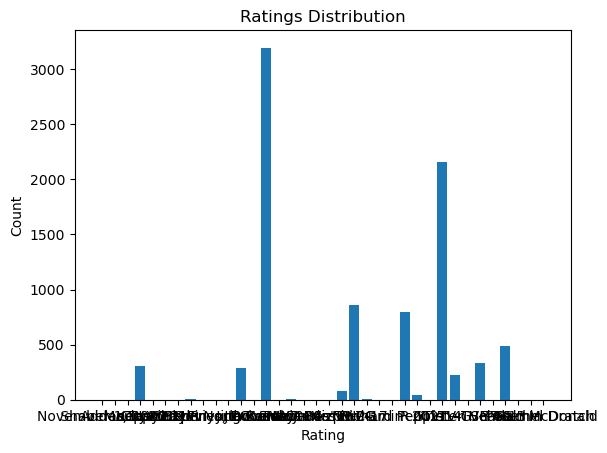

In [81]:
# Utilize libraries like Matplotlib or Seaborn for visualizations
import matplotlib.pyplot as plt

ratings_distribution_pd_filtered = ratings_distribution_pd.dropna(subset=['rating', 'count'])

# Visualizing ratings distribution
plt.bar(ratings_distribution_pd_filtered['rating'], ratings_distribution_pd_filtered['count'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings Distribution')
plt.show()



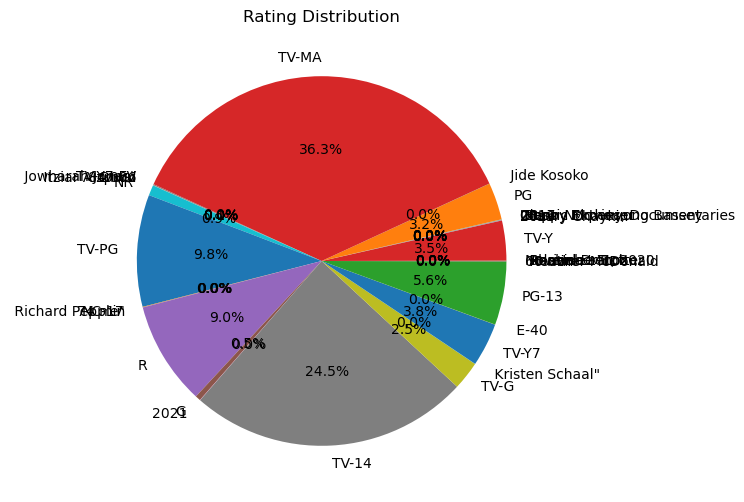

In [84]:
# pie chart of Rating Distribution
plt.figure(figsize=(8, 6))
plt.pie(ratings_distribution_pd_filtered['count'], labels=ratings_distribution_pd_filtered['rating'], autopct='%1.1f%%')
plt.title('Rating Distribution')
plt.show()


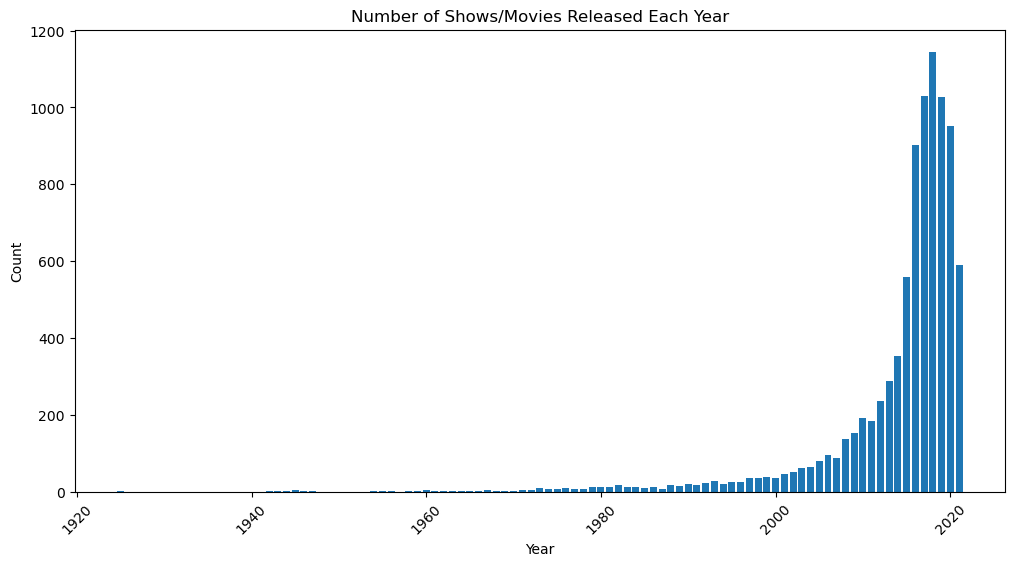

In [89]:
# Convert 'release_year' to string type
shows_added_per_year_pd['release_year'] = shows_added_per_year_pd['release_year'].astype(str)

# Remove non-numeric entries and extract the first four characters (assuming 'release_year' contains year information)
shows_added_per_year_pd['release_year'] = shows_added_per_year_pd['release_year'].str.extract(r'(\d{4})')

# Drop rows with missing release_year data
shows_added_per_year_pd = shows_added_per_year_pd.dropna(subset=['release_year'])

# Convert 'release_year' to integer type
shows_added_per_year_pd['release_year'] = shows_added_per_year_pd['release_year'].astype(int)

# Plotting the bar chart for Yearly Shows/Movies Count
plt.figure(figsize=(12, 6))
plt.bar(shows_added_per_year_pd['release_year'], shows_added_per_year_pd['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Shows/Movies Released Each Year')
plt.xticks(rotation=45)
plt.show()
